#  TRANSFORMACIÓN DE DATOS

Hay una plantilla de excel "FaseDesarrollo_PlantillaTransformaciones.xlsx"

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

1.- Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = '../../'

2.- Nombrar los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_eda.pickle'
nombre_num = 'num_resultado_eda.pickle'

3.- Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat).reset_index(drop = True)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num).reset_index(drop = True)

4.- Separar la target.

In [5]:
#Reviso cual era la target a predecir
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   compra                 4840 non-null   int64  
 1   visitas_total          4840 non-null   Int64  
 2   tiempo_en_site_total   4840 non-null   int64  
 3   paginas_vistas_visita  4840 non-null   float64
 4   score_actividad        4840 non-null   float64
 5   score_perfil           4840 non-null   float64
dtypes: Int64(1), float64(3), int64(2)
memory usage: 231.7 KB


In [6]:
target = num[['compra']].copy().reset_index(drop=True)

Esto lo hago de momento solo por si hago un target encoding

## Proceso, para elegir la transformación 

In [113]:
num.columns.to_frame()

,0
compra,compra
visitas_total,visitas_total
tiempo_en_site_total,tiempo_en_site_total
paginas_vistas_visita,paginas_vistas_visita
score_actividad,score_actividad
score_perfil,score_perfil


Lo trato en el excel

* Target encoding no lo voy hacer por sencillez ya que genera muchas variables, el que tiene sentido es el OHE, como si hiciera los dos al final tendria que seleccionar una al final lo mejor es quedarme solo con ohe, asi me evito complicarme

OHE o OE? la diferencia es si la variable es nominal o ordinal, eso es lo que va a determinar cual es mejor.

Voy a verlo mirando por variable como son los datos

In [114]:
cat.origen.value_counts()

origen
Landing Page Submission    3060
API                        1508
Lead Add Form               239
OTROS                        33
Name: count, dtype: int64

Es una variable nominal, OHE

In [115]:
cat.fuente.value_counts()

fuente
Google            1897
Direct Traffic    1555
Organic Search     732
Chat               299
Reference          222
OTROS              135
Name: count, dtype: int64

Es una variable nominal, OHE

In [116]:
cat.ult_actividad.value_counts()

ult_actividad
Email Opened               2008
SMS Sent                   1503
Page Visited on Website     380
Converted to Lead           286
Chat Conversation           273
OTROS                       243
Email Link Clicked          147
Name: count, dtype: int64

Es una variable nominal, OHE

In [117]:
cat.ambito.value_counts()

ambito
Select                               1210
Finance Management                    599
Marketing Management                  539
Human Resource Management             524
OTROS                                 380
Operations Management                 316
Business Administration               258
Supply Chain Management               222
Banking, Investment And Insurance     219
IT Projects Management                212
Media and Advertising                 139
Travel and Tourism                    116
International Business                106
Name: count, dtype: int64

Es una variable nominal, OHE

In [118]:
cat.ocupacion.value_counts()

ocupacion
Unemployed              4277
Working Professional     420
Student                  122
OTROS                     21
Name: count, dtype: int64

esta seria una zona gris, estudiante menos que desempleado que un trabajador en activo

pero puede haber estudiantes con mas capacidad que un desempleado

entonces ohe

In [119]:
cat.descarga_lm.value_counts()

descarga_lm
No     3002
Yes    1838
Name: count, dtype: int64

Es una variable nominal, OHE

**numericas**

* visitas_totales

hay que tomar la decision si se quiere binarizar o normalizar pero para el proyecto que estoy haciendo ahora realmente no lo necesito porque busco prediccion, discretizar tiene sentido si mas tarde le quiero dar una explicacion

teniendo en cuenta que me interesa hacer una segmentacion para poder ver los segmentos de clientes potenciales entonces la parte de normalizar tampoco la voy a hacer porque las variables eran bastante normales

Reescalado si porque hare un K Means que es muy sensible a las escalas

Cual elijo?

Robust scaler lo descarto porque no tengo un problema de atipicos, las que habia atipicos las quite

mms o ss?

dado que todas las variables categoricas les voy a hacer un OHE, lo que mas sentido tiene es aplicar a mms porque esa transformacion lo convierte de 0-1

En este caso es importante porque voy a hacer una cluster, si hiciera solo modelizacion predictiva no pasa nada por hacer ss pero al hacer un cluster si lo hiciera con ss me dejaria una escala de -4 a +4 en cambio con mms no, lo que me hace que no vaya a haber un impacto con el 0-1 que hace el OHE

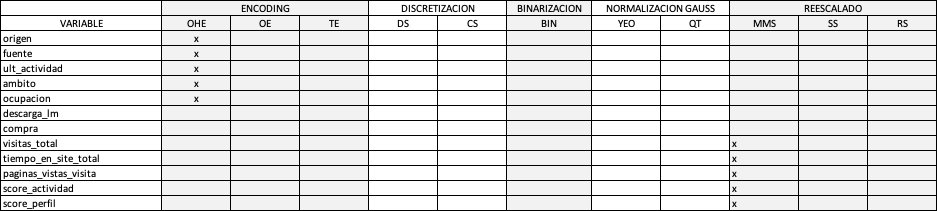

## TRANSFORMACIÓN DE CATEGÓRICAS

### One Hot Encoding

#### Variables a aplicar OHE

In [7]:
var_ohe = ['origen','fuente','ult_actividad','ambito','ocupacion','descarga_lm']

#### Instanciar

In [8]:
ohe = OneHotEncoder(sparse = False, handle_unknown='ignore')

#### Entrenar y aplicar

In [9]:
cat_ohe = ohe.fit_transform(cat[var_ohe])

/Users/stevenallus/miniconda3/envs/leadscoring/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Guardar como dataframe

In [10]:
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out())

In [11]:
cat_ohe

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ambito_Operations Management,ambito_Select,ambito_Supply Chain Management,ambito_Travel and Tourism,ocupacion_OTROS,ocupacion_Student,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4836,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4837,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4838,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


---


## TRANSFORMACIÓN DE NUMÉRICAS

No hay ninguna transformacion

## UNIFICAR DATASETS TRANSFORMADOS

In [12]:
#en vez de aplicar la plantilla es mas facil hacerlo a mano

pd.concat([cat_ohe,num], axis=1) #como apilo columnas axis=1

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,compra,visitas_total,tiempo_en_site_total,paginas_vistas_visita,score_actividad,score_perfil
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0,0,0,0.0,15.0,15.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0,5,674,2.5,15.0,15.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,2,1532,2.0,14.0,20.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0,1,305,1.0,13.0,17.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1,2,1428,1.0,15.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0,2,1770,2.0,14.0,20.0
4836,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1,13,1409,2.6,14.0,16.0
4837,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0,2,238,2.0,14.0,19.0
4838,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1,3,499,3.0,15.0,16.0


In [13]:
concatenated = pd.concat([cat_ohe, num], axis=1)
nulos_por_columna = concatenated.isnull().sum()
print(nulos_por_columna)

origen_API                                  0
origen_Landing Page Submission              0
origen_Lead Add Form                        0
origen_OTROS                                0
fuente_Chat                                 0
fuente_Direct Traffic                       0
fuente_Google                               0
fuente_OTROS                                0
fuente_Organic Search                       0
fuente_Reference                            0
ult_actividad_Chat Conversation             0
ult_actividad_Converted to Lead             0
ult_actividad_Email Link Clicked            0
ult_actividad_Email Opened                  0
ult_actividad_OTROS                         0
ult_actividad_Page Visited on Website       0
ult_actividad_SMS Sent                      0
ambito_Banking, Investment And Insurance    0
ambito_Business Administration              0
ambito_Finance Management                   0
ambito_Human Resource Management            0
ambito_IT Projects Management     

No hay nulos por lo que me esta cogiendo bien los indices, si no lo hiciera tendria que revisar el indice de cada una

pd.concat([cat_ohe,num.reset_index()], axis=1)

In [14]:
df = pd.concat([cat_ohe,num.reset_index()],axis=1)
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,index,compra,visitas_total,tiempo_en_site_total,paginas_vistas_visita,score_actividad,score_perfil
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0,0,0,0,0.0,15.0,15.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1,0,5,674,2.5,15.0,15.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2,1,2,1532,2.0,14.0,20.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3,0,1,305,1.0,13.0,17.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4,1,2,1428,1.0,15.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4835,0,2,1770,2.0,14.0,20.0
4836,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4836,1,13,1409,2.6,14.0,16.0
4837,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4837,0,2,238,2.0,14.0,19.0
4838,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4838,1,3,499,3.0,15.0,16.0


## REESCALAR VARIABLES

### Con Min-Max

Porque empiezo con un .info()?

Hay consenso en que es conveniente reescalar todas las variables que son numericas, pero dentro de las variables que son categoricas, puedo decidir si quiero reescalar las variables que han sido fruto de un OHE (por su propia naturaleza ya son variables 0-1, por lo que de una manera ya estan reescaladas). Pasaria lo mismo con el Ordinal encoding y Target encoding, puedo dejarlas como estan o reescalarlas. 

Si decidido reescalar, reescalo todo lo que no es un OHE.

El .info sirve para que las primeras hasta la doce en este caso (fijate que se repiten).

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 43 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   origen_API                                4840 non-null   float64
 1   origen_Landing Page Submission            4840 non-null   float64
 2   origen_Lead Add Form                      4840 non-null   float64
 3   origen_OTROS                              4840 non-null   float64
 4   fuente_Chat                               4840 non-null   float64
 5   fuente_Direct Traffic                     4840 non-null   float64
 6   fuente_Google                             4840 non-null   float64
 7   fuente_OTROS                              4840 non-null   float64
 8   fuente_Organic Search                     4840 non-null   float64
 9   fuente_Reference                          4840 non-null   float64
 10  ult_actividad_Chat Conversation     

tendria que aplicar a partir de la 38 que son las numericas, el resto son las de ohe. compra e index no las quiero reescalar tampoco

#### Variables a reescalar con Min-Max

Lo pone en una escala de 0-1

In [16]:
var_mms = df.iloc[:,38:].columns

In [17]:
var_mms

Index(['visitas_total', 'tiempo_en_site_total', 'paginas_vistas_visita',
       'score_actividad', 'score_perfil'],
      dtype='object')

#### Instanciar

In [18]:
mms = MinMaxScaler()

#### Entrenar y aplicar

In [19]:
df_mms = mms.fit_transform(df[var_mms])

#### Guardar como dataframe

In [20]:
#Añadir sufijos a los nombres
nombres_mms = [variable + '_mms' for variable in var_mms]

#Guardar como dataframe
df_mms = pd.DataFrame(df_mms,columns = nombres_mms)

## UNIFICAR DATASETS REESCALADOS

### Crear una lista con los dataframes a incluir en el tablón analítico

In [21]:
pd.concat([cat_ohe, df_mms], axis = 1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   origen_API                                4840 non-null   float64
 1   origen_Landing Page Submission            4840 non-null   float64
 2   origen_Lead Add Form                      4840 non-null   float64
 3   origen_OTROS                              4840 non-null   float64
 4   fuente_Chat                               4840 non-null   float64
 5   fuente_Direct Traffic                     4840 non-null   float64
 6   fuente_Google                             4840 non-null   float64
 7   fuente_OTROS                              4840 non-null   float64
 8   fuente_Organic Search                     4840 non-null   float64
 9   fuente_Reference                          4840 non-null   float64
 10  ult_actividad_Chat Conversation     

Verifico que estan todas las varialbes que he transformado

ver que estan todas las de mms

falta el index de cliente, sino despues no puedo cruzar la informacion y tambien tengo que incorporar la variable target

esta target la tengo guardada desde el inicio como la variable "target"

In [22]:
df.index

RangeIndex(start=0, stop=4840, step=1)

Las dos, df.index y pd.concat... tienen 4840 registros por lo que puedo pegarlas

In [23]:
ind_df = pd.DataFrame(df.index, columns=['Index_Column_Name'])
ind_df

,Index_Column_Name
0,0
1,1
2,2
3,3
4,4
...,...
4835,4835
4836,4836
4837,4837
4838,4838


In [24]:
pd.concat([ind_df,cat_ohe, df_mms,target], axis = 1).isna().sum()

Index_Column_Name                           0
origen_API                                  0
origen_Landing Page Submission              0
origen_Lead Add Form                        0
origen_OTROS                                0
fuente_Chat                                 0
fuente_Direct Traffic                       0
fuente_Google                               0
fuente_OTROS                                0
fuente_Organic Search                       0
fuente_Reference                            0
ult_actividad_Chat Conversation             0
ult_actividad_Converted to Lead             0
ult_actividad_Email Link Clicked            0
ult_actividad_Email Opened                  0
ult_actividad_OTROS                         0
ult_actividad_Page Visited on Website       0
ult_actividad_SMS Sent                      0
ambito_Banking, Investment And Insurance    0
ambito_Business Administration              0
ambito_Finance Management                   0
ambito_Human Resource Management  

perfecto no hay nulo

In [25]:
result = pd.concat([ind_df, cat_ohe, df_mms, target], axis=1)
result = result.set_index('Index_Column_Name')  # Reemplaza 'Index_Column_Name' con el nombre correcto de la columna
result

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
Index_Column_Name,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.00,0.000000,0.000000,0.7,0.444444,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.10,0.299157,0.166667,0.7,0.444444,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.04,0.679982,0.133333,0.6,1.000000,1
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.02,0.135375,0.066667,0.5,0.666667,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.04,0.633822,0.066667,0.7,0.777778,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.04,0.785619,0.133333,0.6,1.000000,0
4836,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.26,0.625388,0.173333,0.6,0.555556,1
4837,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.04,0.105637,0.133333,0.6,0.888889,0


### Unir todos los dataframes en el tablón analítico

In [26]:
df_tablon = result

## GUARDAR DATASET TRAS TRANSFORMACIÓN DE DATOS

En formato pickle para no perder las modificaciones de metadatos.

In [27]:
#Definir los nombres del archivo
ruta_df_tablon = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'df_tablon.pickle'

In [28]:
#Guardar los archivos
df_tablon.to_pickle(ruta_df_tablon)